In [1]:
print('hello')

hello


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# downloading the libraries

import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap # correlation matrix

# worldcloud
import random
from wordcloud import WordCloud

# display ERD
from IPython.display import Image



# I - Exploring the data 

objective is to get more familiar with the data and review pandas / visulization logic

## A - Fetching the data 

In [4]:
# understanding where the files are located with terminal operations



In [5]:
# adding the path to fetch the files

raw_path = '/Users/albertschool/albert-hod-shared/data/olist_datasets'


In [6]:
# creating pandas dataframes from .csv

df_customer = pd.read_csv('/Users/albertschool/albert-hod-shared/data/olist_datasets/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('/Users/albertschool/albert-hod-shared/data/olist_datasets/olist_geolocation_dataset.csv')
df_orders = pd.read_csv('/Users/albertschool/albert-hod-shared/data/olist_datasets/olist_orders_dataset.csv')
df_order_items = pd.read_csv('/Users/albertschool/albert-hod-shared/data/olist_datasets/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('/Users/albertschool/albert-hod-shared/data/olist_datasets/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('/Users/albertschool/albert-hod-shared/data/olist_datasets/olist_order_reviews_dataset.csv')
df_products = pd.read_csv('/Users/albertschool/albert-hod-shared/data/olist_datasets/olist_products_dataset.csv')
df_sellers = pd.read_csv('/Users/albertschool/albert-hod-shared/data/olist_datasets/olist_sellers_dataset.csv')


## B - Exploring the orders dataframe

In [7]:
# printing columns, null count, and dtypes for the orders dataframe
df_orders.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
# printing the first 10 lines of the orders dataframe

df_orders.head(10)

# the last 10 lines of the dataframe

df_orders.tail(10)

# a sample of ten lines

df_orders.sample(10)

# getting all null values

df_orders.isna().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**why are there null values for approved_at, delivered_carrier_date, delivered_customer_date?**

*-> answer:*  nulls here represent incomplete orders or steps in the pipeline that didn’t happen due to various reasons like cancellations, pending statuses, or data issues.

In [9]:
# fetching only particular columns of the df_orders dataframe

## fetch the order_approved_at columns in a data series format, then in a dataframe format, and print the first five lines

order_approved_series = df_orders[['order_approved_at']]
order_approved_series.head()

## fetch the order_id, order_status, approved_at, delivered_carrier_date, delivered_customer_date

df_test = df_orders[['order_id', 'order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']]
df_test.head()


,order_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02


In [10]:
# fetching the approved_at null columns - create another dataframe df_filtered, which will be filtered on order_approved_at is null, and print first 10 rows

df_filtered = df_orders[df_orders['order_approved_at'].isnull()]
df_filtered.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
3056,ddaec6fff982b13e7e048b627a11d6da,68f4ad79cc0c2ad06e19088f5c00e9fa,canceled,2016-10-04 19:41:32,NaN,NaN,NaN,2016-11-16 00:00:00
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,NaN,NaN,NaN,2018-09-06 00:00:00
3684,03310aa823a66056268a3bab36e827fb,25dbbf0c477fd4ae0880aaffbb12e8b3,canceled,2018-08-07 16:33:59,NaN,NaN,NaN,2018-09-04 00:00:00
4373,4c8b9947280829d0a8b7e81cc249b875,403c35c4d8813bf67b3d396b91ca1619,canceled,2018-08-09 14:54:47,NaN,NaN,NaN,2018-08-21 00:00:00
4939,b13ea375fe9c728832688264638f84cf,0dc5884bc5ffba283678229f27e07ff9,canceled,2018-08-22 18:52:29,NaN,NaN,NaN,2018-09-19 00:00:00


In [11]:
# count the order_id with a null approved_at by order_status

# with groupby method

df_gby = df_filtered.groupby('order_status')[['order_id']].count()
df_gby = df_filtered.groupby('order_status').agg(order_count=('order_id','count'))
df_gby

# with value_counts method
df_grouped = df_filtered['order_status'].value_counts().reset_index(name='order_count').rename(columns={'index': 'order_status'})
df_grouped.head()


,order_status,order_count
0,canceled,141
1,delivered,14
2,created,5


**what do you think of the results? Why is there a null approved at to begin with?**

-> *answer*: Most order_approved_at nulls are expected (canceled or incomplete orders), but the small number of delivered ones should be flagged for further review — they likely reflect data quality issues.

## C - Creating a simple visualization using Matplotlib or Seaborn

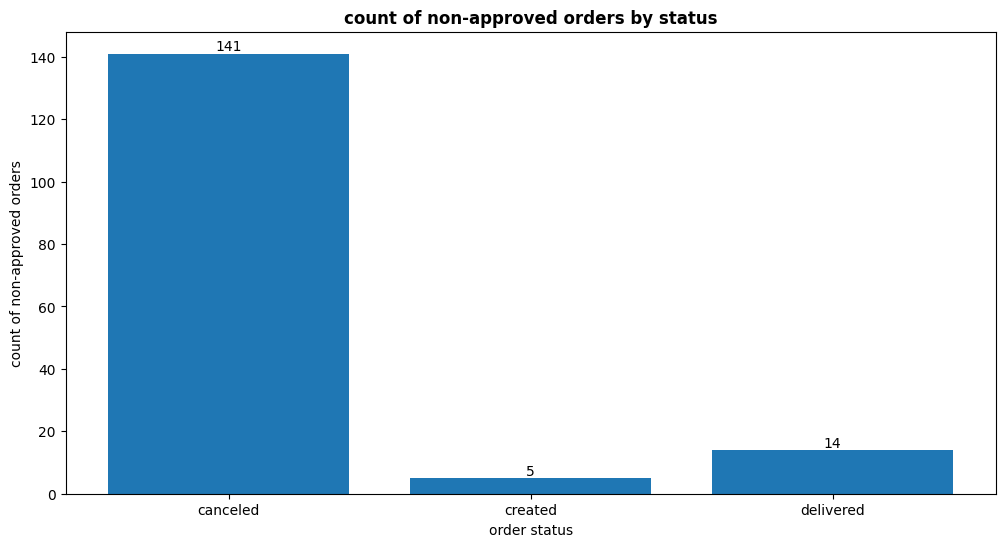

In [12]:
# Creating a simple plot with matplotlib: count of non-approved orders by status

non_approved_orders = df_orders[df_orders['order_approved_at'].isnull()]
non_approved_counts = non_approved_orders.groupby('order_status')['order_id'].count()
fig, ax  = plt.subplots(figsize=(12,6))
ax = plt.bar(non_approved_counts.index,non_approved_counts.values)

for index, value in enumerate(non_approved_counts):
    plt.text(index,value,str(value),ha='center',va='bottom')
    
plt.xlabel('order status')
plt.ylabel('count of non-approved orders')
plt.title('count of non-approved orders by status', fontsize=12, fontweight='bold')
plt.show()


/var/folders/hy/m34w8mzj657f1_3lhxh7vfzh0000gp/T/ipykernel_10119/2230655923.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='order_status', y='order_id', data=non_approved_counts,palette='pastel')


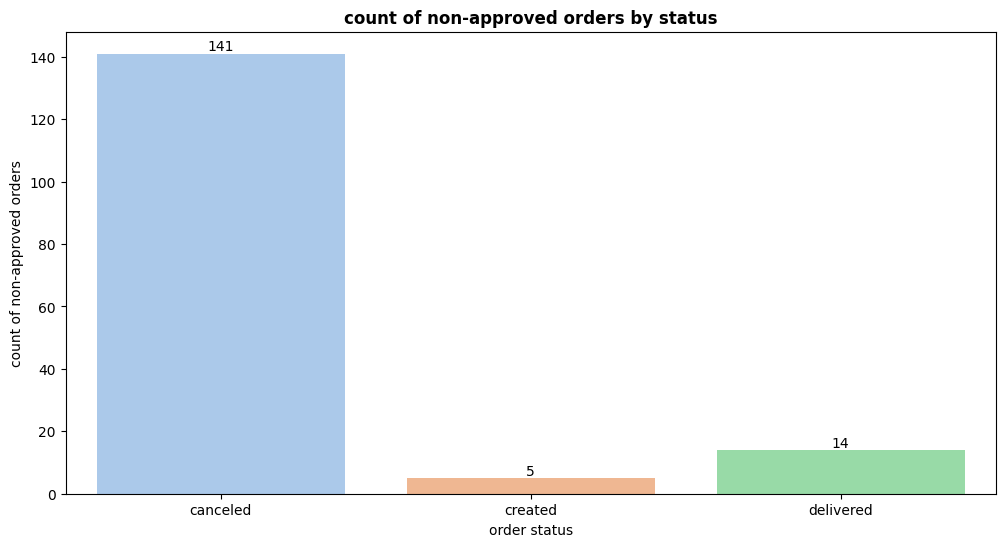

In [13]:
# Creating a simple plot with seaborn: count of non-approved orders by status

non_approved_orders = df_orders[df_orders['order_approved_at'].isnull()]
non_approved_counts = non_approved_orders.groupby('order_status')['order_id'].count().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(x='order_status', y='order_id', data=non_approved_counts,palette='pastel')

for index, row in non_approved_counts.iterrows():
    ax.text(index, row['order_id'], row['order_id'], ha='center', va='bottom')

plt.xlabel('order status')
plt.ylabel('count of non-approved orders')
plt.title('count of non-approved orders by status', fontsize=12, fontweight='bold')
plt.show()


## D - Exploring all dataframes at once

In [14]:
# an interesting way to look at all dataframes at once, to quickly get what are the null columns

# Collections for each dataset
datasets = [df_customer, df_geolocation, df_orders, df_order_items, df_order_payments,
            df_order_reviews, df_products, df_sellers]
names = ['df_customer', 'df_geolocation', 'df_orders', 'df_order_items', 'df_order_payments',
         'df_order_reviews', 'df_products', 'df_sellers']

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()


,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,df_customer,99441,5,0,0,
1,df_geolocation,1000163,5,0,0,
2,df_orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,df_order_items,112650,7,0,0,
4,df_order_payments,103886,5,0,0,
5,df_order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
6,df_products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,df_sellers,3095,4,0,0,


**What are the dataframes with the most null columns? What's your explanation?**

*->answer:* The dataframes with the most null columns are df_products (8), df_orders (3), and df_order_reviews (2). These nulls likely come from incomplete product details, unprocessed or canceled orders, and customers leaving reviews without comments.

## E - Joining 2 dataframes - how many orders were created in SP state?

In [15]:
# which dataframes do we need to join to answer the question? Explore the dataframes and look for a link between orders and state
# To answer the question we should the customer dataframe and the orders dataframe as they have the customer_id in common and there is the customer state in the customer dataframe. 



In [16]:
# Merge the 2 datasets in a new df_merged dataset, and print the first 5 rows

df_merged = df_orders.merge(df_customer, on='customer_id')
df_merged.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [17]:
# filter the dataframe to have only rows with state = SP, and print the first 5 lines

df_orders_sp = df_merged[df_merged['customer_state'] == 'SP']
df_orders_sp.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP
11,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,782987b81c92239d922aa49d6bd4200b,4278,sao paulo,SP
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP


In [18]:
# count the number of orders by state, using both groupby and value_counts

# with groupby method, with reset.index for a dtaframe view 
orders_by_state_gby = df_merged.groupby('customer_state')['order_id'].count().reset_index()

#Renaming the columns here for more clarity in reading.
orders_by_state_gby.columns = ['state', 'order_count']
orders_by_state_gby.head()


# with value_counts method,  with reset.index for a dtaframe view 
orders_by_state_vc = df_merged['customer_state'].value_counts().reset_index()

#Renaming the columns here for more clarity in reading. 
orders_by_state_vc.columns = ['state', 'value count']
orders_by_state_vc.head()


,state,value count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


# II - Exploratory analysis 

our objective is to a) give an overview of the business, b) understand what's driving the bad reviews

## A - Creating a uniform dataframe for our analysis

**Creating an ERD of the database**

- in an ERD diagram tool 
- create one item per table
- list all columns
- list their type
- find the primary and foreign keys
- link the tables together

--> upload directly the ERD in the notebook 

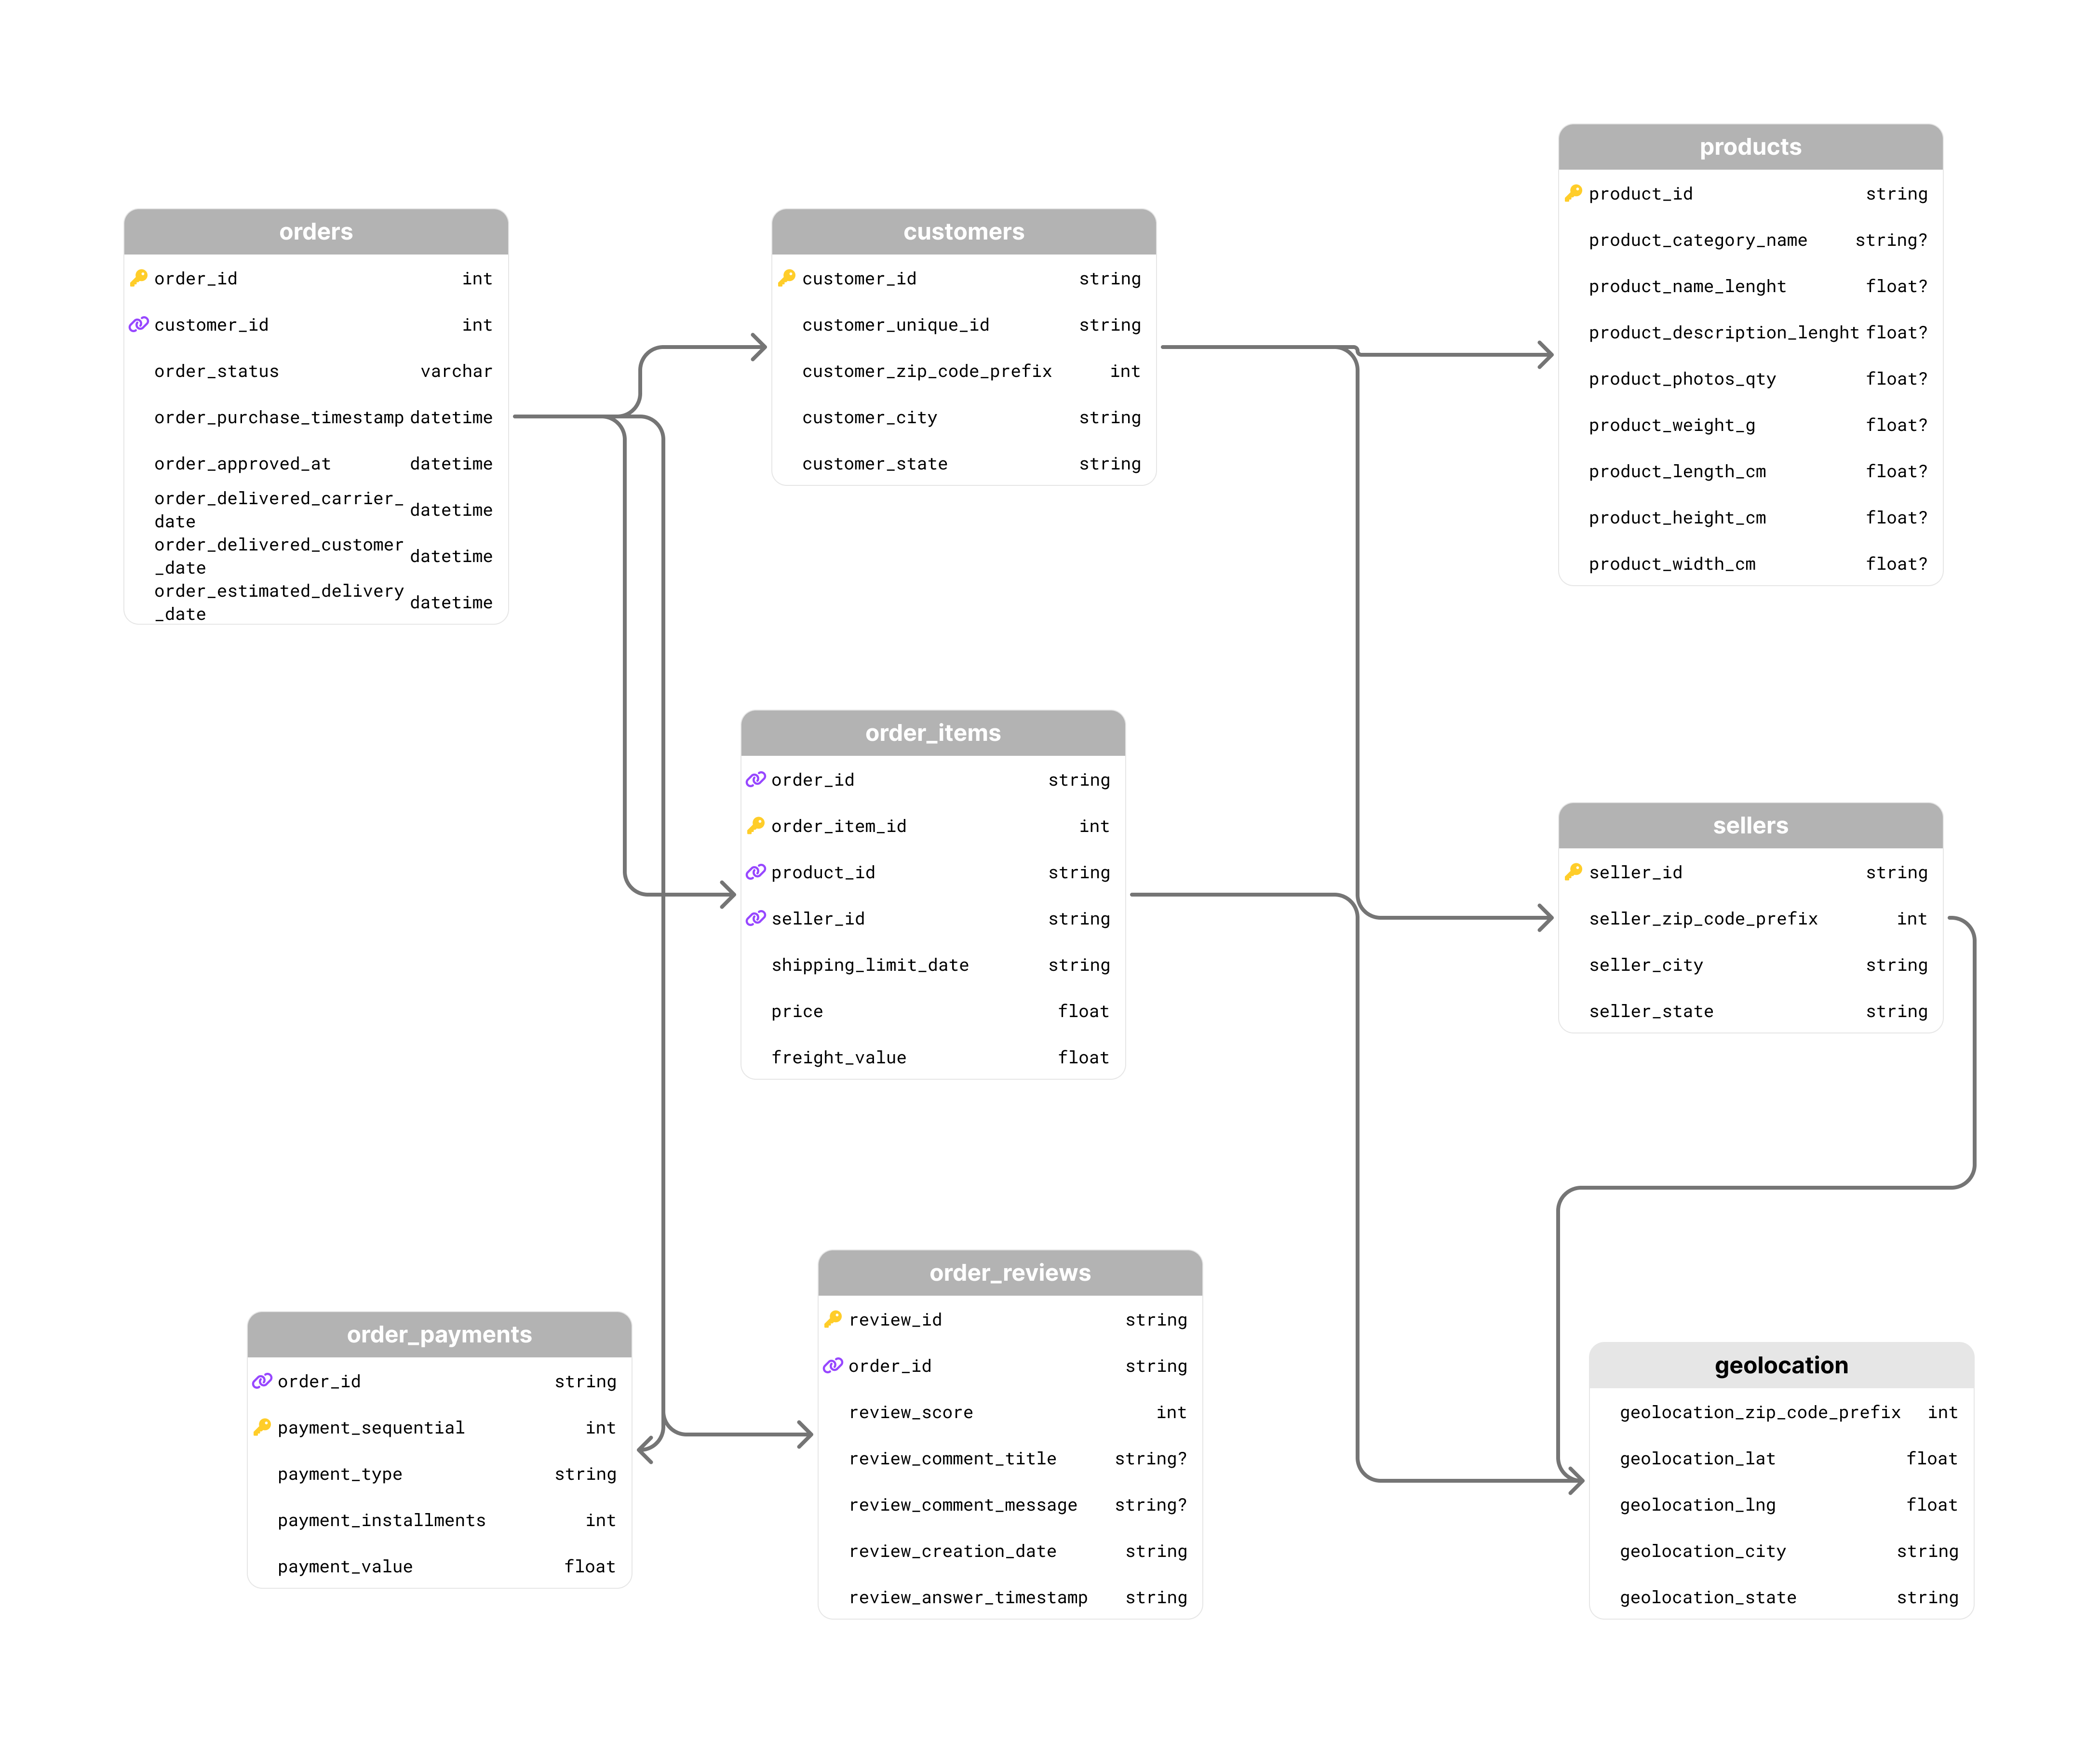

In [19]:
# Displaying the image with Ipython Image module

## the image is in the data/ERD folder
filename = 'Welcome to FigJam.png'

Image(filename=filename)


In [20]:
# Merging the dataframes using the ERD above

df = df_orders.merge(df_order_items, how='left', on='order_id')
df = df.merge(df_products, how='left', on='product_id')
df = df.merge(df_customer, how='left', on='customer_id')
df = df.merge(df_sellers, how='left', on='seller_id')
df = df.merge(df_order_reviews, how='left', on='order_id')
#df = df.merge(df_geolocation, how='left', left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')
#df = df.merge(df_order_payments, how='left', on='order_id')
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842.0,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752.0,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [21]:
# Cleaning the dataframe and creating additional columns that will be useful for further analysis

# Ensure timestamps are in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Create useful features from order_purchase_timestamp
df['year'] = df['order_purchase_timestamp'].dt.year                   # year as integer
df['month'] = df['order_purchase_timestamp'].dt.month                 # month as integer
df['week'] = df['order_purchase_timestamp'].dt.isocalendar().week                   # week in iso format (1, 2, 3 etc.)
df['day_of_week_int'] = df['order_purchase_timestamp'].dt.weekday + 1        # day of week as integer (1 = Monday, etc.)
df['hour'] = df['order_purchase_timestamp'].dt.hour                  # hour of day
df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)            # year and month, just like 2017-10

df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_time,year,month,week,day_of_week_int,hour,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8.0,2017,10,40,1,10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13.0,2018,7,30,2,20,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,9.0,2018,8,32,3,8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842.0,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13.0,2017,11,46,6,19,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752.0,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2.0,2018,2,7,2,21,2018-02


## B - Looking at Reviews

### 1 - Let's look at the distribution of the review score

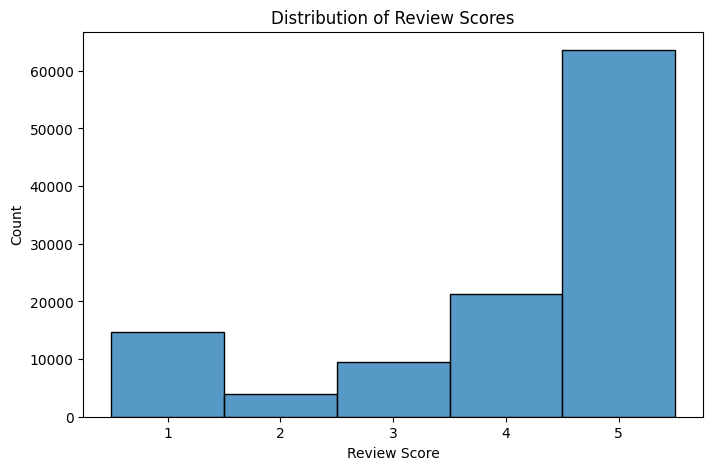

In [22]:
# Create a distribution plot (dist plot) with seaborn on the review score

plt.figure(figsize=(8, 5))
sns.histplot(df['review_score'], bins=5, kde=False, discrete=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

**What do you make of those results?**

*->answer:* The results show that most customers gave a 5-star review, followed by a decent number of 4-star reviews. We can say that overall customer satisfaction is very high. However, the presence of 1-star reviews also indicates that while rare, some customers had a poor experience worth exploring further.

### 2 - Let's look at the customer verbatims

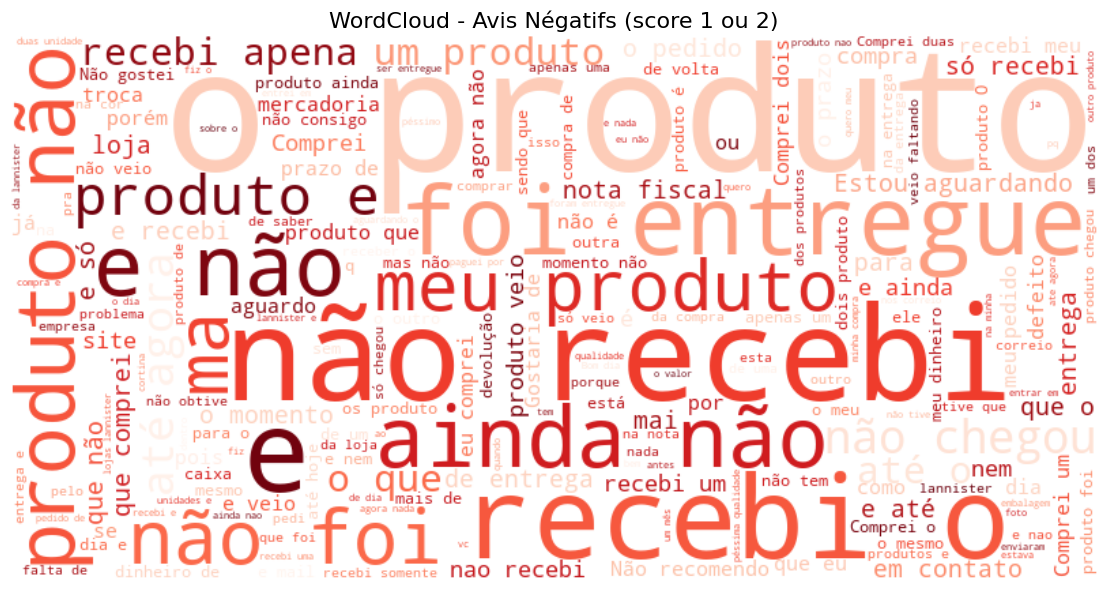

In [23]:
# Create a wordcloud on orders with negative reviews only

negative_reviews = df[df['review_score'] <= 2]

negative_text = negative_reviews['review_comment_message'].dropna().str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Avis Négatifs (score 1 ou 2)', fontsize=16)
plt.tight_layout()
plt.show()

**What are the first reasons you see behind a bad review? What could we do to improve this wordcloud?**

*-> answer:* Regarding the words cloud we can assume that the main reasons behind bad reviews appear to be delays or failures in product delivery — words like "não", "recebi", "produto", "entregue", "ainda", "pedido" suggest customers did not receive their orders or received them late.

### 3 - Let's create a correlation matrix and identify other reasons behind bad reviews

In [24]:
# let's isolate the columns we'll use for our correlation matrix

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   customer_id                    114092 non-null  object        
 2   order_status                   114092 non-null  object        
 3   order_purchase_timestamp       114092 non-null  datetime64[ns]
 4   order_approved_at              113930 non-null  object        
 5   order_delivered_carrier_date   112112 non-null  object        
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114092 non-null  object        
 8   order_item_id                  113314 non-null  float64       
 9   product_id                     113314 non-null  object        
 10  seller_id                      113314 non-null  object        
 11  

In [25]:
# bonus: can we create additional features?
# example: create a is_delivered column?

'your code'


'your code'

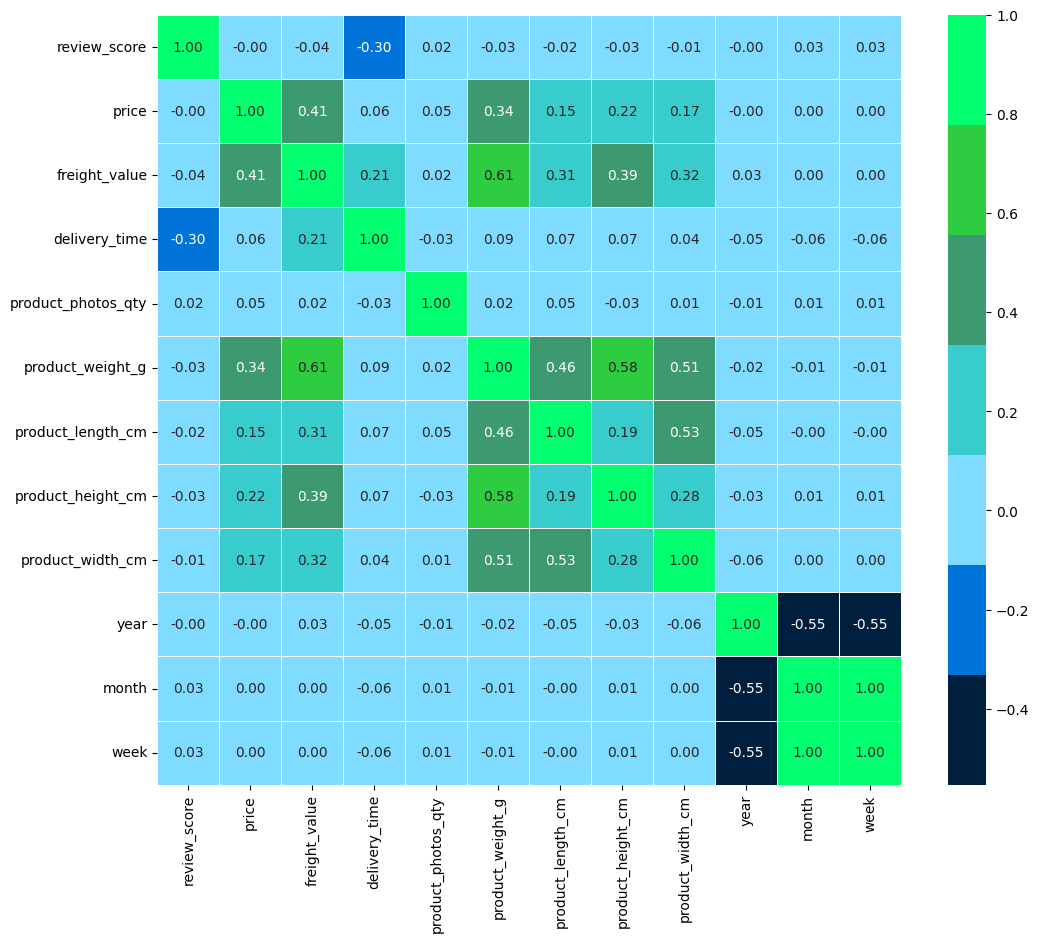

In [26]:
# Create the correlation matrix based on the columns you want

# Select relevant features for correlation analysis

colors = ['#001F3F', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70']

correlation_features = df[['review_score','price', 'freight_value', 'delivery_time','product_photos_qty','product_weight_g', 'product_length_cm', 
                           'product_height_cm', 'product_width_cm', 'year', 'month', 
                           'week']]

# Calculate the correlation matrix
correlation = correlation_features.corr()

# use seaborn to print the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap=colors, fmt=".2f", linewidths=0.5, cbar=True)

plt.show()

**What are the correlations you see?**

*-> answer:*

## C - Looking at orders

### 1 - Orders by statuses

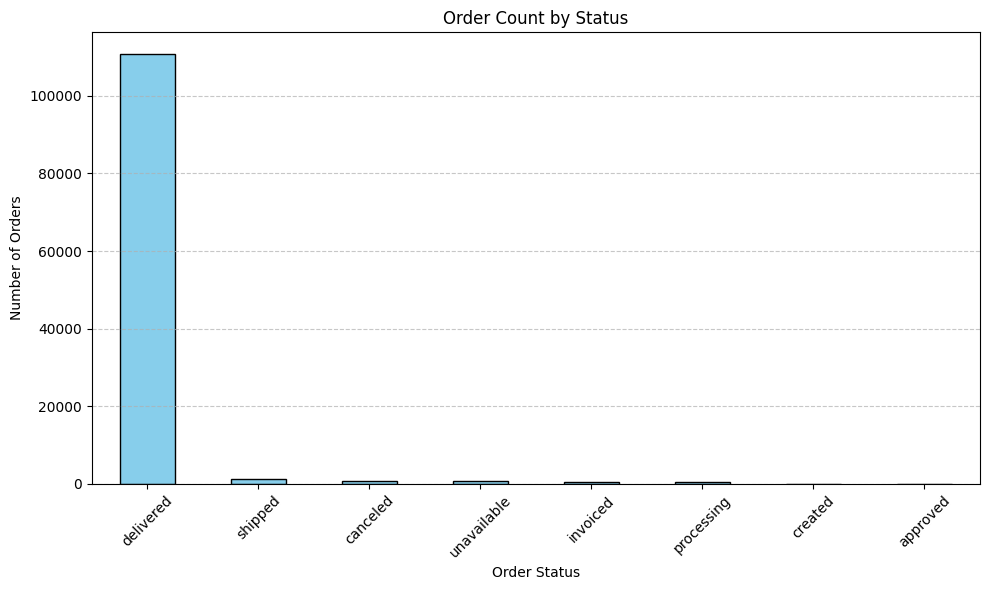

In [27]:
# Create a visualization to count the orders by statuses

status_counts = df['order_status'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Order Count by Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2 - Evolution of total orders over time

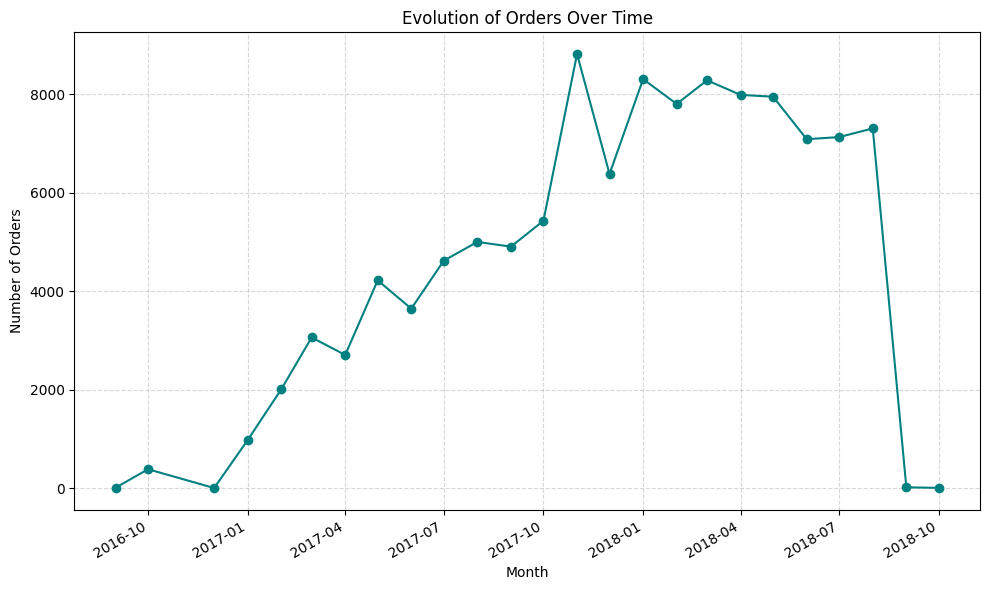

In [28]:
# Create a visualization to see the evolution of orders over time

# Extract month and year from the timestamp
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Count number of orders per month
monthly_orders = df['order_month'].value_counts().sort_index()

# Convert PeriodIndex to datetime for plotting
monthly_orders.index = monthly_orders.index.to_timestamp()

# Plotting
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o', color='teal')
plt.title('Evolution of Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 3 - Comparing 2017 and 2018 (bonus)

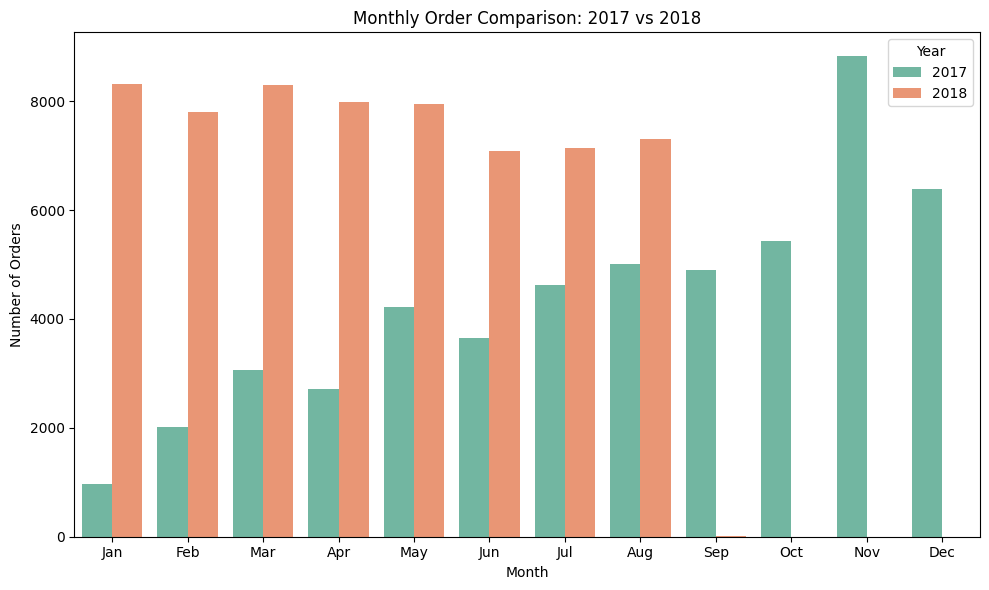

In [29]:
# Create a visualization to compare 2017 and 2018 on the same graph (bar charts with a "hue" = 'year'

# Extract year and month
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month

# Filter only 2017 and 2018 for comparison
df_filtered = df[df['year'].isin([2017, 2018])]

# Group by year and month, then count the number of orders
monthly_orders = df_filtered.groupby(['year', 'month']).size().reset_index(name='order_count')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_orders, x='month', y='order_count', hue='year', palette='Set2')
plt.title('Monthly Order Comparison: 2017 vs 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title='Year')
plt.tight_layout()
plt.show()


## D - Delivery times

### 1 - Delivery time by product category

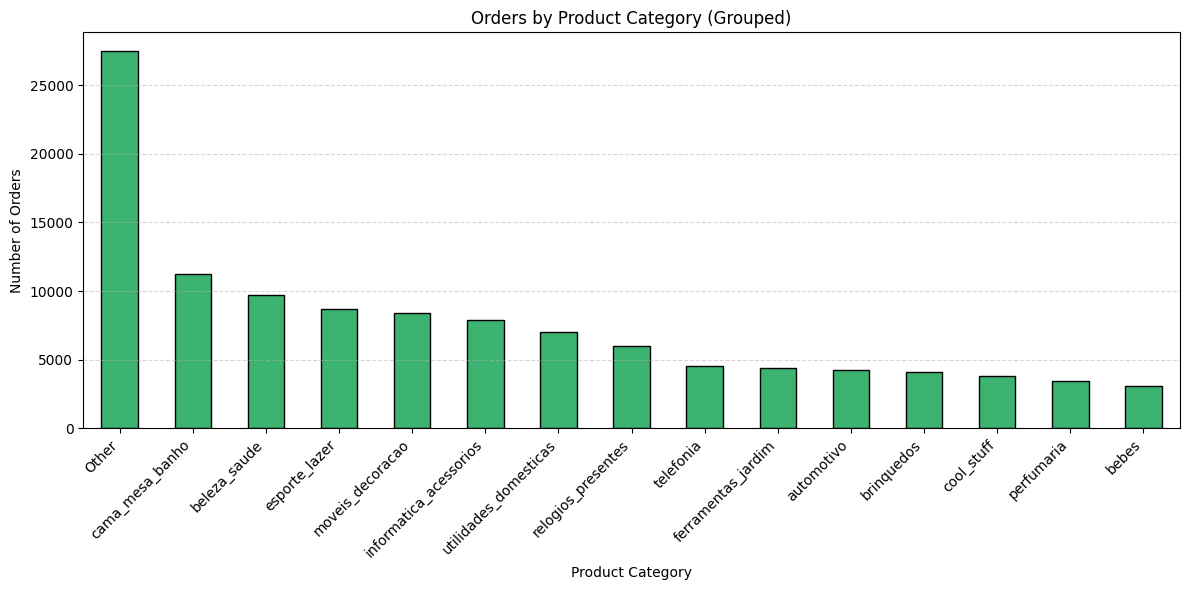

In [30]:
# Start by counting the orders by product category, and create an 'Other section' for product categories that have the lowest amount of orders

# Step 1: Count the number of orders by product category
category_counts = df['product_category_name'].value_counts()

# Step 2: Define a threshold and separate out less frequent categories
threshold = 3000
common_categories = category_counts[category_counts > threshold].index

# Step 3: Create a new column grouping low-frequency categories as 'Other'
df['category_grouped'] = df['product_category_name'].apply(
    lambda x: x if x in common_categories else 'Other'
)

# Step 4: Count again using the grouped category column
grouped_counts = df['category_grouped'].value_counts()

# Step 5: Plot the grouped category counts
plt.figure(figsize=(12, 6))
grouped_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Orders by Product Category (Grouped)')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



/var/folders/hy/m34w8mzj657f1_3lhxh7vfzh0000gp/T/ipykernel_10119/224342743.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='product_category_name', y='delivery_time', palette='Set3')


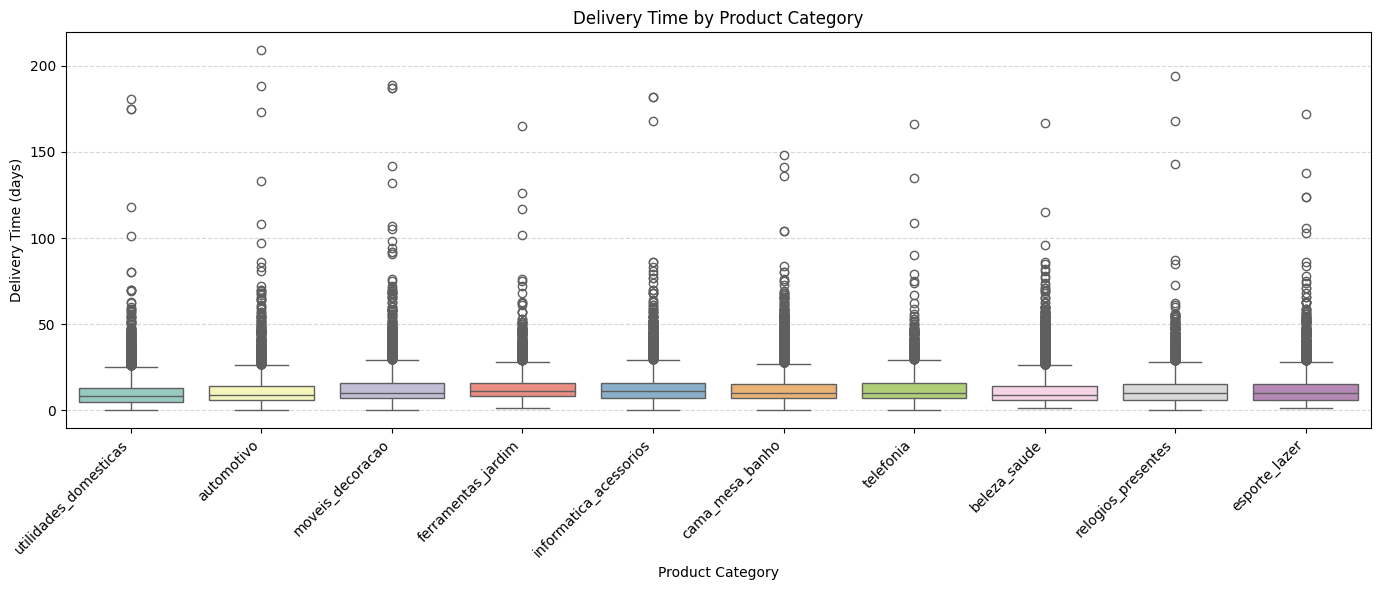

In [31]:
# Create a boxplot visualization that shows the delivery time by product category

# Calculate delivery time in days
#df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Optional: remove rows with negative or missing delivery times
df = df[df['delivery_time'] >= 0].dropna(subset=['delivery_time'])

# Optional: filter to top categories for readability
top_categories = df['product_category_name'].value_counts().nlargest(10).index
df_filtered = df[df['product_category_name'].isin(top_categories)]

# Plotting
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='product_category_name', y='delivery_time', palette='Set3')
plt.title('Delivery Time by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Delivery Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### 2 - Delivery time by day of the week

/var/folders/hy/m34w8mzj657f1_3lhxh7vfzh0000gp/T/ipykernel_10119/1413191712.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='purchase_day', y='delivery_time', inner='box', order=day_order, palette='pastel')


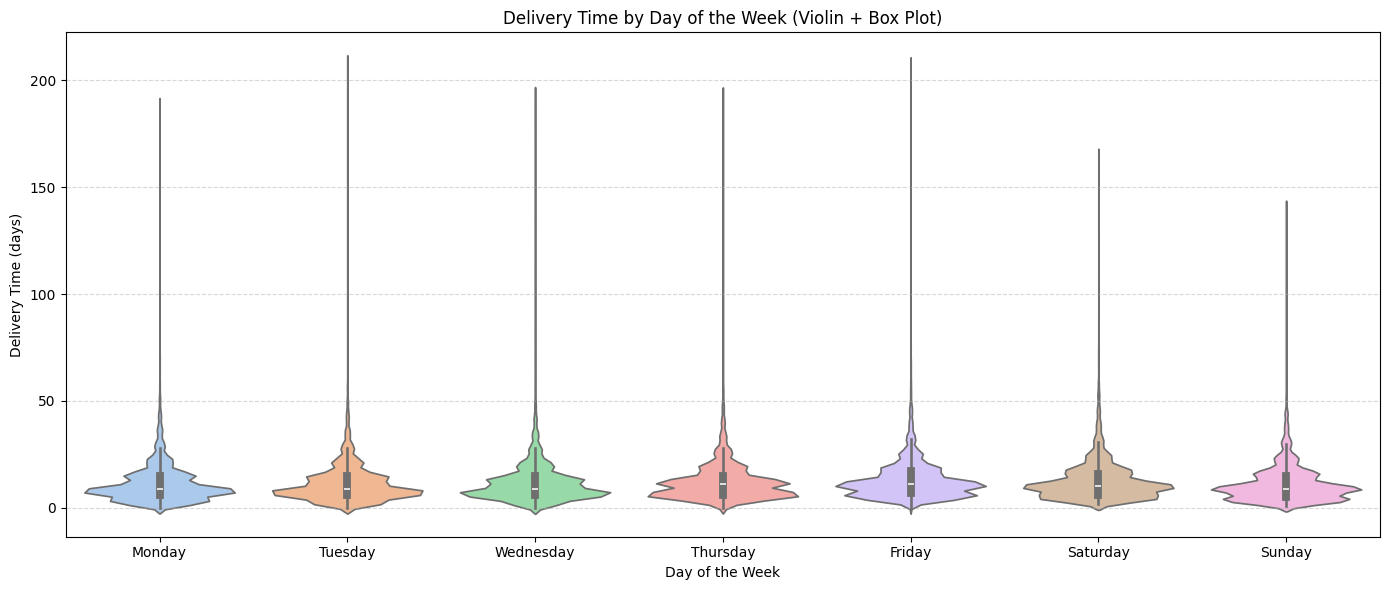

In [32]:
# Create a violin box plot visualization to see the delivery time by day of the week

# Calculate delivery time in days
#df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Remove rows with missing or negative delivery times
df = df[df['delivery_time'] >= 0].dropna(subset=['delivery_time'])

# Get the day of the week from the order_purchase_timestamp
df['purchase_day'] = df['order_purchase_timestamp'].dt.day_name()

# Order days of the week for consistency
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='purchase_day', y='delivery_time', inner='box', order=day_order, palette='pastel')
plt.title('Delivery Time by Day of the Week (Violin + Box Plot)')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (days)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 3 - Average delivery time by month  (bonus)

/var/folders/hy/m34w8mzj657f1_3lhxh7vfzh0000gp/T/ipykernel_10119/1007191257.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg_delivery_time, x='purchase_month', y='delivery_time', palette='Blues_d', order=month_order)


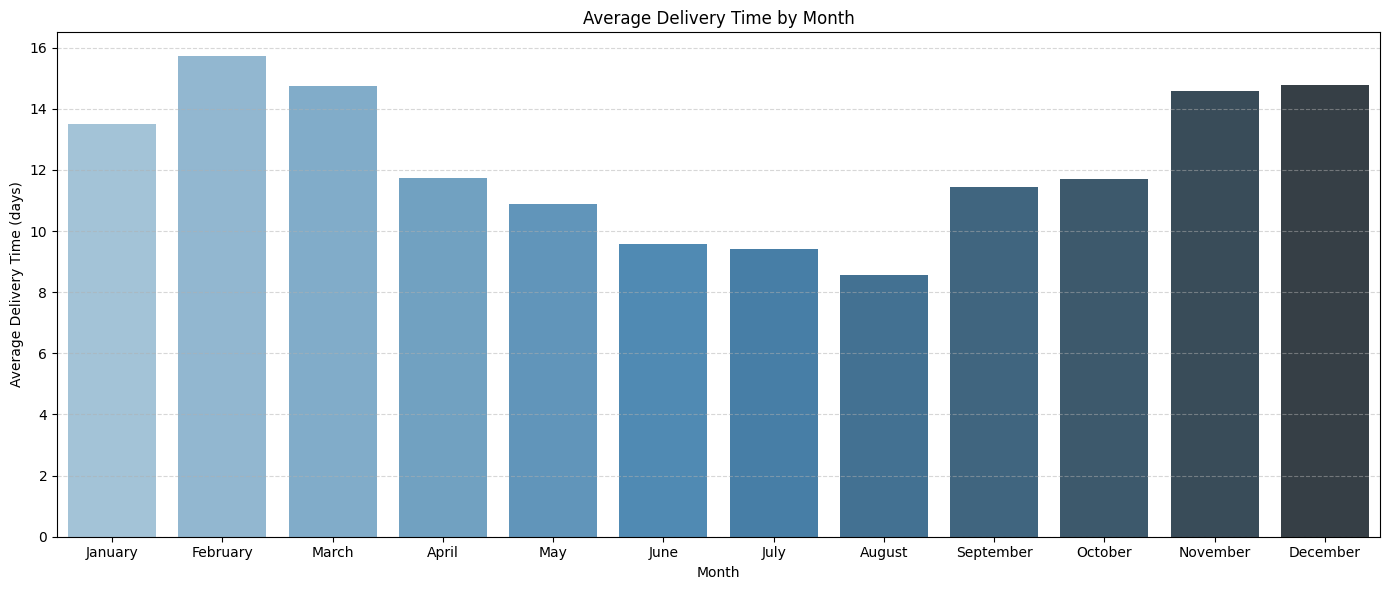

In [33]:
# Create barplot for the monthly average delivery time

# Calculate delivery time in days
#df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Remove rows with missing or negative delivery times
df = df[df['delivery_time'] >= 0].dropna(subset=['delivery_time'])

# Extract the month from the order_purchase_timestamp
df['purchase_month'] = df['order_purchase_timestamp'].dt.month_name()

# Calculate average delivery time per month
monthly_avg_delivery_time = df.groupby('purchase_month')['delivery_time'].mean().reset_index()

# Order months for consistency
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the barplot
plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_avg_delivery_time, x='purchase_month', y='delivery_time', palette='Blues_d', order=month_order)
plt.title('Average Delivery Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (days)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



## E - Bonus

### 1 - Order distribution by day of week and time of day 

/var/folders/hy/m34w8mzj657f1_3lhxh7vfzh0000gp/T/ipykernel_10119/3659650394.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='purchase_day', palette='Set2', order=day_order)


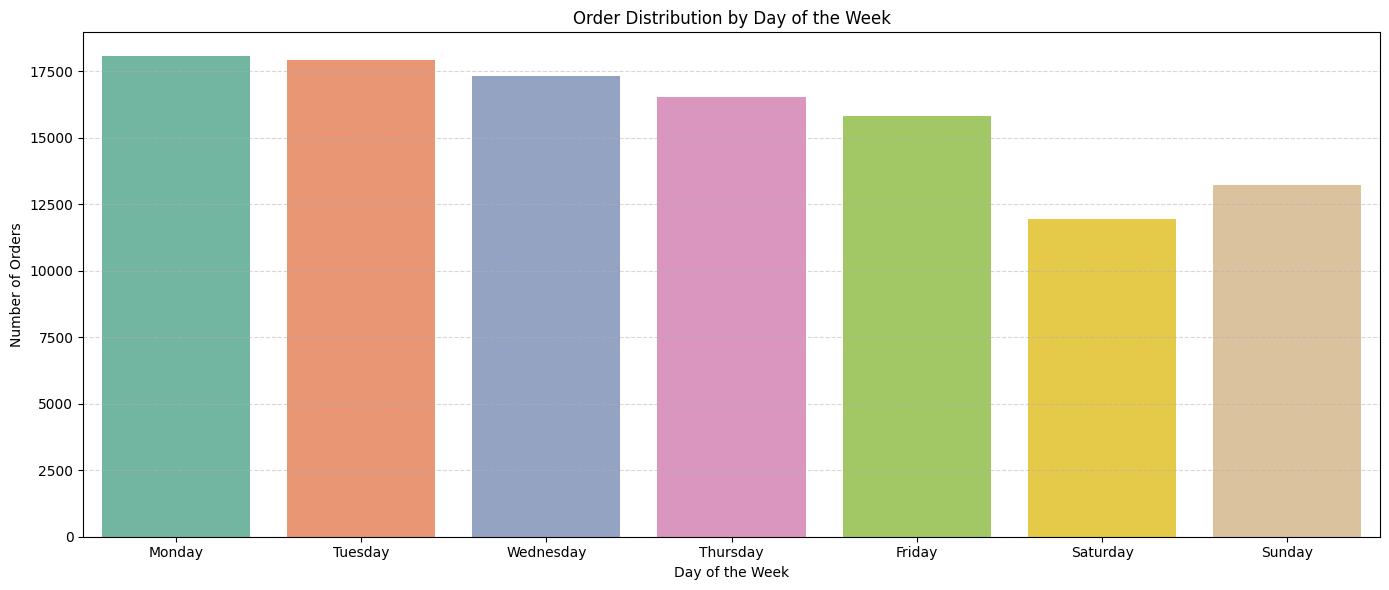

In [34]:
# Count plot showing order distribution by day of week

# Extract the day of the week from the order_purchase_timestamp
df['purchase_day'] = df['order_purchase_timestamp'].dt.day_name()

# Order days of the week for consistency
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the count plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='purchase_day', palette='Set2', order=day_order)
plt.title('Order Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/hy/m34w8mzj657f1_3lhxh7vfzh0000gp/T/ipykernel_10119/4174092045.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='time_of_day', palette='Set1', order=['Late Night', 'Morning', 'Afternoon', 'Evening'])


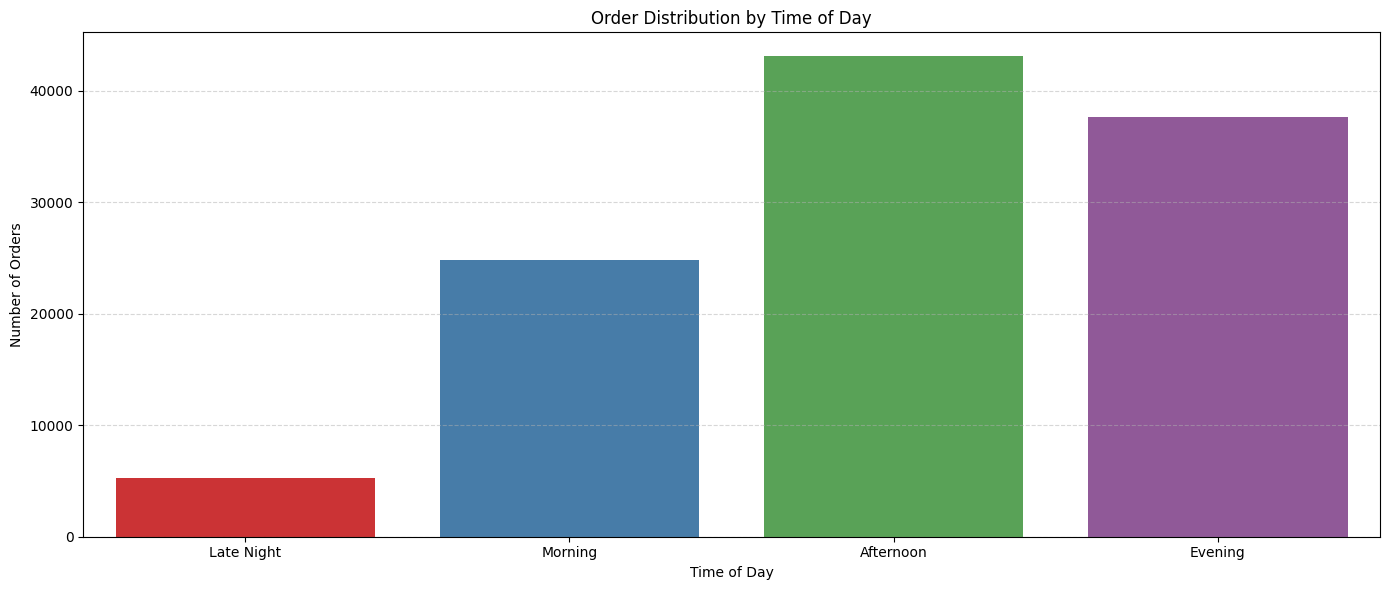

In [35]:
# Count plot showing order distribution by time of day

# Extract the hour from the order_purchase_timestamp
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour

# Define time of day categories
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the time_of_day function to the 'purchase_hour'
df['time_of_day'] = df['purchase_hour'].apply(time_of_day)

# Plotting the count plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='time_of_day', palette='Set1', order=['Late Night', 'Morning', 'Afternoon', 'Evening'])
plt.title('Order Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 2 - Payments

In [36]:
# Create a donut (pie chart) that show transactions by payment types



In [37]:
# Show the evolution of payment types over time

'your code here'


'your code here'

### 3 - Geolocation

In [38]:
# Create a heatmap of all orders by location using an API to retrieve the latitude and longitude of every location, and display them on a map

'your code here'


'your code here'

### 4 - Profit computation

In [39]:
# Show the monthly profit evolution for the best 4 product categories
# x axis: months
# y axis: gross profit (payment value - total order value)
# hue : top product categories

'your code here'


'your code here'